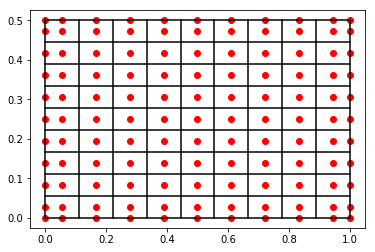

[[10.         13.47296355 20.         25.32088886 28.79385242 30.
  28.79385242 25.32088886 20.         13.47296355 10.        ]
 [10.         12.40388577 16.9217132  20.60467986 23.00856563 23.84342639
  23.00856563 20.60467986 16.9217132  12.40388577 10.        ]
 [10.         11.29896414 13.74021816 15.73034668 17.02931081 17.48043632
  17.02931081 15.73034668 13.74021816 11.29896414 10.        ]
 [10.         10.70909307 12.04175211 13.12814571 13.83723878 14.08350421
  13.83723877 13.12814571 12.0417521  10.70909306 10.        ]
 [10.         10.3925591  11.13032889 11.73176433 12.12432343 12.26065777
  12.12432342 11.73176431 11.13032888 10.3925591  10.        ]
 [10.         10.2218359  10.63875102 10.97862333 11.20045921 11.27750199
  11.20045917 10.97862326 10.63875096 10.22183588 10.        ]
 [10.         10.12948178 10.37282793 10.5712055  10.70068723 10.7456557
  10.70068707 10.57120525 10.37282769 10.12948168 10.        ]
 [10.         10.07981766 10.22982576 10.35211341 

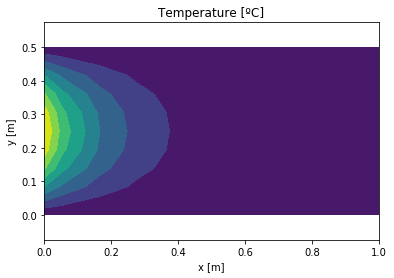

In [10]:
# MTF072 Computational Fluid Dynamics
# Task 1: diffusion equation
# Template prepared by:
# Gonzalo Montero Villar
# Department of Mechanics and Maritime Sciences
# Division of Fluid Dynamics
# villar@chalmers.se
# November 2019

# Packages needed
import numpy as np
import matplotlib.pyplot as plt

#================= Inputs =====================

# Geometric inputs

nI = 10 # number of nodes X direction.
nJ =  10 # number of nodes Y direction.
grid_type = 'equidistant' # this sets equidistant mesh sizing or non-equidistant
xL =  1 # length of the domain in X direction
yL =  0.5 # length of the domain in Y direction
b = -1.5

# Solver inputs

nIterations  = 1000 # maximum number of iterations
resTolerance = 0.1 # convergence criteria for residuals each variable

# ================ Code =======================

# For all the matrices the first input makes reference to the x coordinate
# and the second input to the y coordinate, [i+1] is east and [j+1] north

# Allocate all needed variables
cI = nI + 1                    # number of cells in the X direction. Cells 
                                # added in the boundaries
cJ = nJ + 1                    # number of cells in the Y direction. Cells 
                                # added in the boundaries
coeffsT = np.zeros((cI,cJ,5))  # coefficients for temperature
                                # E, W, N, S and P
S_U     = np.zeros((cI,cJ))    # source term for temperature
S_P     = np.zeros((cI,cJ))    # source term for temperature
T       = np.zeros((cI,cJ))    # temperature matrix
k       = np.zeros((cI,cJ))    # coefficient of conductivity
q       = np.zeros((cI,cJ,2))  # heat flux, first x and then y component

residuals = [] # List containing the value of the residual for each iteration

# Generate mesh and compute geometric variables

# Allocate all variables matrices
xCoords_C = np.zeros((cI,cJ)) # X coords of the cells
yCoords_C = np.zeros((cI,cJ)) # Y coords of the cells
xCoords_N = np.zeros((nI,nJ)) # X coords of the nodes
yCoords_N = np.zeros((nI,nJ)) # Y coords of the nodes
dxe_C     = np.zeros((cI,cJ)) # X distance to east cell
dxw_C     = np.zeros((cI,cJ)) # X distance to west cell
dyn_C     = np.zeros((cI,cJ)) # Y distance to north cell
dys_C     = np.zeros((cI,cJ)) # Y distance to south cell
dx_C      = np.zeros((cI,cJ)) # X size of the cell
dy_C      = np.zeros((cI,cJ)) # Y size of the cell
R         = np.zeros((cI,cJ)) # Residuals Matrix


if grid_type == 'equidistant':
    # Cell size
    dx = xL/(nI - 1)
    dy = yL/(nJ - 1)

    # Fill the coordinates
    for i in range(nI):
        for j in range(nJ):
            # For the nodes
            xCoords_N[i,j] = i*dx
            yCoords_N[i,j] = j*dy

            # For the cells
            if i > 0:
                xCoords_C[i,j] = 0.5*(xCoords_N[i,j] + xCoords_N[i-1,j])
            if i == (nI-1) and j>0:
                yCoords_C[i+1,j] = 0.5*(yCoords_N[i,j] + yCoords_N[i,j-1])
            if j >0:
                yCoords_C[i,j] = 0.5*(yCoords_N[i,j] + yCoords_N[i,j-1])
            if j == (nJ-1) and i>0:
                xCoords_C[i,j+1] = 0.5*(xCoords_N[i,j] + xCoords_N[i-1,j])

            # Fill dx_C and dy_C
            if i>0:
                dx_C[i,j] = xCoords_N[i,j] - xCoords_N[i-1,j]
            if j>0:
                dy_C[i,j] = yCoords_N[i,j] - yCoords_N[i,j-1]
elif grid_type == 'non-equidistant':
    rx = 1.15
    ry = 1.15
    
    # Fill the necessary code to generate a non equidistant grid and
    # fill the needed matrixes for the geometrical quantities
    
xCoords_C[-1,:] = xL
yCoords_C[:,-1] = yL

plt.plot(xCoords_C,yCoords_C,'ro')
plt.plot(xCoords_N, yCoords_N,'k')
plt.plot(np.transpose(xCoords_N), np.transpose(yCoords_N),'k')
plt.show()

# Gauss Seidel Solver


# Fill dxe, dxw, dyn and dys
for i in range(1,cI - 1):
    for j in range(1,cJ - 1):
        dxe_C[i,j] = xCoords_C[i+1,j]-xCoords_C[i,j]
        dxw_C[i,j] = xCoords_C[i,j]-xCoords_C[i-1,j]
        dyn_C[i,j] = yCoords_C[i,j+1]-yCoords_C[i,j]
        dys_C[i,j] = yCoords_C[i,j]-yCoords_C[i,j-1]


# Initialize variable matrices and boundary conditions
T[:,0]= 10 #Boundary 1
T[:,-1]=10 #Boundary 3

T[0,:]=10+20*np.sin((np.pi*yCoords_C[1,:])/yL) #Boundary 4
      

# Looping

for iter in range(nIterations):
    
    # Update conductivity coefficient matrix, k
    k=5*(1+(100*xCoords_C/xL))
#        
#    # Update source term matrix according to your case
    S_U[i,j]=b*dx_C[i,j]*dy_C[i,j]
    
#    # Compute coefficients (taking into account boundary conditions)
    for i in range(1,cI-1):
        for j in range(1,cJ-1):
            
        
            kC=k[i,j]#for the cell
            kE=k[i+1,j]#for the east cell
            kW=k[i-1,j]#for the west cell
            kN=k[i,j+1]#for the north cell
            kS=k[i,j-1]#for the south cell
            
            ke=0.5*(kC+kE)
            kw=0.5*(kC+kW)
            kn=0.5*(kN+kC)
            ks=0.5*(kC+kS)
            


                
            Ae=ke*dy_C[i,j]/dxe_C[i,j]
            Aw=kw*dy_C[i,j]/dxw_C[i,j]
            An=kn*dx_C[i,j]/dyn_C[i,j]
            As=ks*dx_C[i,j]/dys_C[i,j]

            Ap=Ae+Aw+An+As
            
            coeffsT[i,j,0] = Ae
            coeffsT[i,j,1] = Aw
            coeffsT[i,j,2] = An
            coeffsT[i,j,3] = As
            coeffsT[i,j,4] = Ap     
            
            
    # Solve for T Gauss-Seidel
            
#            TP=T[i,j]
            TW=T[i-1,j]
            TE=T[i+1,j]
            TN=T[i,j+1]
            TS=T[i,j-1]
            
            T[i,j]=(Aw*TW+Ae*TE+An*TN+As*TS+S_U[i,j])/Ap
            
#    
##    # Copy T to boundaries where homegeneous Neumann needs to be applied
            T[cI-1,:]=T[cI-2,:]
##    
##    # Compute residuals (taking into account normalization)
#            R[i,j] = abs(coeffsT[i,j,0]*TE + coeffsT[i,j,1]*TW +
#                    coeffsT[i,j,2]*TN + coeffsT[i,j,3]*TS+ coeffsT[i,j,4]*TP
#                    -S_U[i,j])
#
#            f1= sum(abs(k[i,0]*dx_C[i,1]*(T[i,0]-T[i,1])/dys_C[i,1]))
#            f4 = sum(abs(k[i,-1]*dx_C[i,-2]*(T[i,-1]-T[i,-2])/dyn_C[i,-2]))
#            f3 = sum(abs(k[-1,j]*dy_C[-2,j]*(T[-1,j]-T[-2,j])/dxe_C[-2,j]))
#            
#    F = f1 + f4 + f3 
#    r = R/F 
    
#    r = 0
##    
##    residuals.append(r)
##    
##    print('iteration: %d\nresT = %.5e\n\n'  % (iter, residuals[-1]))
##    
##    #  Check convergence
##    if resTolerance>residuals[-1]:
##        break
##
#### Compute heat fluxes
#    for i in range(1,cI-2):
#        for j in range(1,cJ-2):
#            TC=T[i,j]
#            TW=T[i-1,j]
#            TE=T[i+1,j]
#            TN=T[i,j+1]
#            TS=T[i,j-1]    
#            
#            Tw=0.5*(TC+TW)
#            Te=0.5*(TC+TE)
#            Tn=0.5*(TC+TN)
#            Ts=0.5*(TC+TS)
#            
#            dTdx=(Te-Tw)/dx_C[i,j]
#            dTdy=(Tn-Ts)/dy_C[i,j]
#            
#            q[i,j,0] = -k[i,j]*dTdx
#            q[i,j,1] = -k[i,j]*dTdx
###    
### Plotting section (these are some examples, more plots might be needed)
##
### Plot results
#plt.figure()
##
# Plot mesh
#plt.subplot(2,2,1)
#plt.plot(xCoords_C,yCoords_C,'ro')
#plt.xlabel('x [m]')
#plt.ylabel('y [m]')
#plt.title('Computational mesh')
#plt.axis('equal')
###
## Plot temperature contour
#plt.subplot(2,2,2)
plt.contourf(xCoords_C,yCoords_C,T)
plt.title('Temperature [ºC]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.axis('equal')
###
#### Plot residual convergence
#plt.subplot(2,2,3)
#plt.title('Residual convergence')
#plt.xlabel('iterations')
#plt.ylabel('residuals [-]')
#plt.title('Residual')
###
#### Plot heat fluxes
#plt.subplot(2,2,4)
#plt.xlabel('x [m]')
#plt.ylabel('y [m]')
#plt.title('Heat flux')
#plt.axis('equal')
###
#plt.show()
##
##    
#
#
print(T)